# Pymaceuticals Inc.
---

### Analysis of Pymaceutical Study

- It appears as though Capomulin and Ramicide were most effective in treating tumors 
- Heavier mice had larger tumors than lighter mice
- Mouse b742 on Capomulin showed its lowest tumor volume at 20days on the regimen
- Capomulin and Ramicide would be the more promising drugs to further research
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
tot_mice = len(mouse_data_df["Mouse ID"].unique())
tot_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupli = mouse_data_df[mouse_data_df[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_dupli_id = mice_dupli["Mouse ID"].unique()
mice_dupli_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dupli_data = mouse_data_df.loc[mouse_data_df["Mouse ID"] == mice_dupli_id[0]]
mice_dupli_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clear_mouse_df = mouse_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clear_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clear_mouse_df1 = clear_mouse_df['Mouse ID'].unique()
clear_num_mice = len(clear_mouse_df1)
clear_num_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drugs_df = clear_mouse_df.set_index(["Drug Regimen"])
groupby_drugs_df = drugs_df.groupby("Drug Regimen")
drugs_mean = groupby_drugs_df["Tumor Volume (mm3)"].mean()
drugs_median = groupby_drugs_df["Tumor Volume (mm3)"].median()
drugs_var = groupby_drugs_df["Tumor Volume (mm3)"].var()
drugs_std = groupby_drugs_df["Tumor Volume (mm3)"].std()
drugs_sem = groupby_drugs_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_mice = pd.DataFrame({"Mean Tumor Vol.":drugs_mean,
                              "Median Tumor Vol.":drugs_median,
                              "Varience Tumor Vol.":drugs_var,
                              "Std. Deviation Tumor Vol.":drugs_std,
                              "Std. Error of Mean Tumor Vol.":drugs_sem})
#Display DF
summary_stats_mice

,Mean Tumor Vol.,Median Tumor Vol.,Varience Tumor Vol.,Std. Deviation Tumor Vol.,Std. Error of Mean Tumor Vol.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_drugs_df = drugs_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
summary_drugs_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

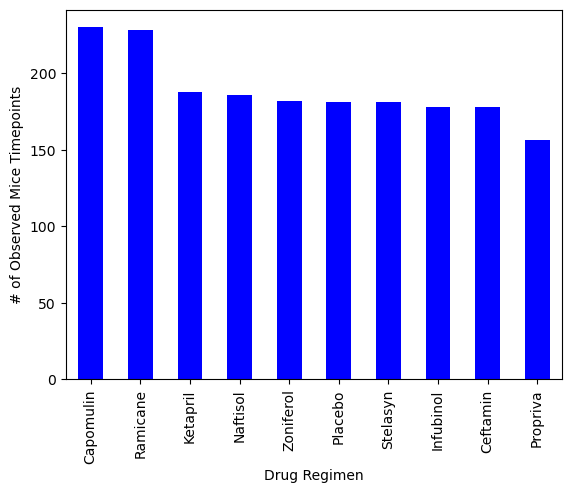

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_reg = clear_mouse_df[["Drug Regimen","Timepoint"]]
mice_drug = mice_reg["Drug Regimen"].value_counts()
mice_drug.plot(kind="bar",color = "b",
                  xlabel="Drug Regimen",
                  ylabel="# of Observed Mice Timepoints")
plt.show()

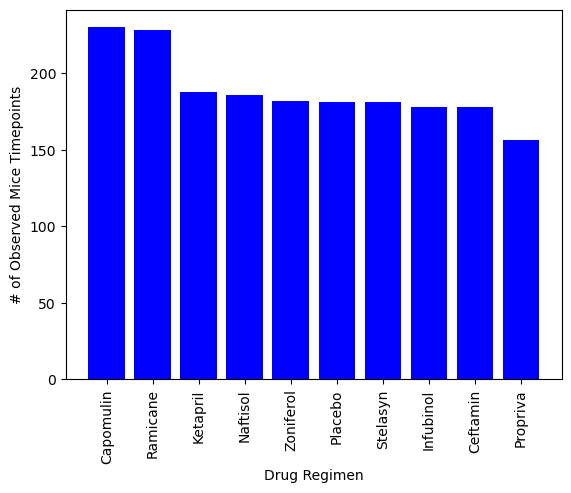

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs_reg = mice_drug.index.values
value = mice_drug.values
plt.bar(drugs_reg, value, color="b", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mice Timepoints')
plt.xticks(rotation=90)
plt.show()

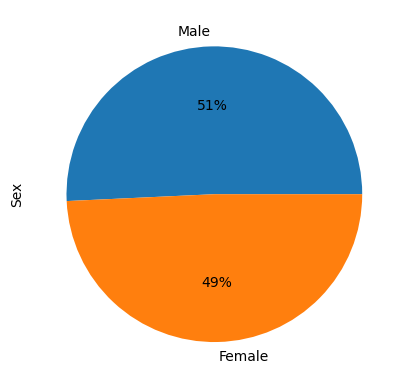

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = clear_mouse_df["Sex"].value_counts()
sex = ["Male", "Female"]
male_vs_female.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")
plt.show()

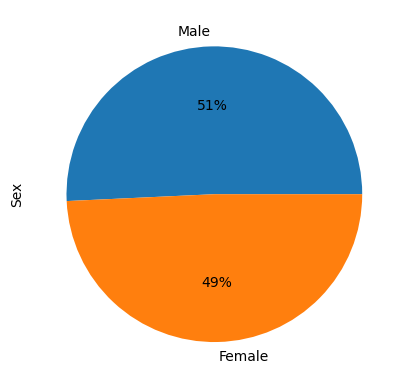

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gend_lab = male_vs_female.index.values
count_val = male_vs_female.values
plt.ylabel("Sex")
plt.pie(count_val, labels = gend_lab, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_vol = clear_mouse_df.groupby(["Mouse ID"])['Timepoint'].max()
tumor_vol = tumor_vol.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Merged_df = tumor_vol.merge(clear_mouse_df,on=['Mouse ID','Timepoint'],how="left")
Merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]

# Create empty list to fill with tumor vol data (for plotting)
Volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for drug in treatments:
    tempdf =  Merged_df.loc[Merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    Volume.append(tempdf)
    quartiles = tempdf.quantile([.25,.50,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    IQR = upperq - lowerq
    low_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    outlier_occupancy = tempdf.loc[(tempdf< low_bound) | (tempdf > upper_bound)]
    print(f"{drug} potential outliers: {outlier_occupancy}")


Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


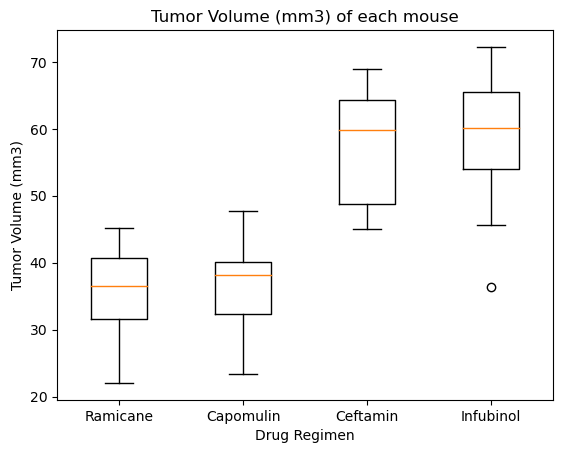

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(Volume, labels= treatments)
plt.title("Tumor Volume (mm3) of each mouse")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

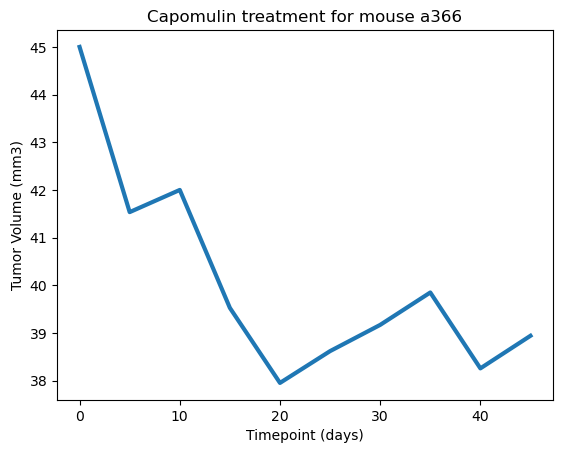

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_b742 = clear_mouse_df.loc[clear_mouse_df["Drug Regimen"] == "Capomulin"].loc[clear_mouse_df["Mouse ID"] == "b742"]
x_axis = line_b742["Timepoint"]
y_axis = line_b742["Tumor Volume (mm3)"]

plt.title("Capomulin treatment for mouse a366")
plt.plot(x_axis, y_axis, linewidth=3)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

C:\Users\Alberto\AppData\Local\Temp\ipykernel_16164\3779121443.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_mice = clear_mouse_df.loc[clear_mouse_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()


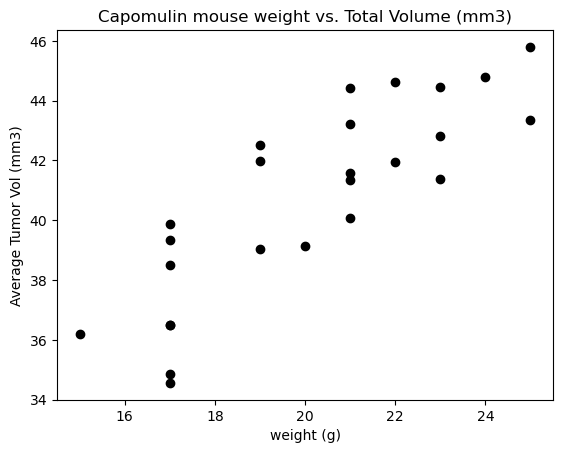

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_mice = clear_mouse_df.loc[clear_mouse_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()

scatter_xaxis = Capomulin_mice["Weight (g)"]
scatter_yaxis = Capomulin_mice["Tumor Volume (mm3)"]

plt.scatter(scatter_xaxis, scatter_yaxis, color = "black")
plt.title("Capomulin mouse weight vs. Total Volume (mm3)")
plt.xlabel("weight (g)")
plt.ylabel("Average Tumor Vol (mm3)")

plt.show()

## Correlation and Regression

C:\Users\Alberto\AppData\Local\Temp\ipykernel_16164\2355739939.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_mice = clear_mouse_df.loc[clear_mouse_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()


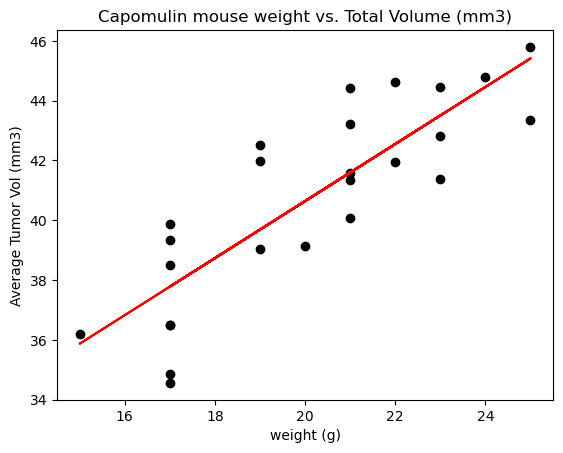

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Capomulin_mice = clear_mouse_df.loc[clear_mouse_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()

scatter_xaxis = Capomulin_mice["Weight (g)"]
scatter_yaxis = Capomulin_mice["Tumor Volume (mm3)"]

m, b = np.polyfit(scatter_xaxis, scatter_yaxis, 1)
plt.plot(scatter_xaxis, m*scatter_xaxis+b, color="red")

plt.scatter(scatter_xaxis, scatter_yaxis, color = "black")
plt.title("Capomulin mouse weight vs. Total Volume (mm3)")
plt.xlabel("weight (g)")
plt.ylabel("Average Tumor Vol (mm3)")

plt.show()